<a href="https://colab.research.google.com/github/HayatHACHEMI/Hottest-Topics-ML/blob/master/Hottest_Topics_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Hottest Topics in Machine Learning** 

Neural Information Processing Systems (NIPS) is one of the top machine learning conferences in the world. It covers topics ranging from deep learning and computer vision to cognitive science and reinforcement learning.

<img src="https://sda.tech/wp-content/uploads/2018/01/Nips.jpg" width="100" height="100" alt="The logo of NIPS (Neural Information Processing Systems)" />

In this Project, we will analyze a large collection of NIPS research papers  to discover the latest trends in machine learning.

 We will perform Natural Language Processing using Python, pandas, sklearn, and the latent Dirichlet allocation (LDA) method on NIPS papers to uncover the trendiest topics in machine learning research.




**Importing Libraries** 

In [13]:
import pandas as pd # TO use pandas Dataframes
import numpy as np

import matplotlib.pyplot as plt  # To vizualize 
%matplotlib inline

import re # The regular expression library
import wordcloud # The wordcloud library

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import LatentDirichletAllocation as LDA # Load the LDA model from sk-learn

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

## **1.Data** 

## **1.1.Loading Data**

The dataset includes the title, authors, abstracts, and extracted text for all NIPS papers to date (ranging from the first 1987 conference to the current 2016 conference), it is available on [Kaggle](https://www.kaggle.com/benhamner/nips-papers?select=papers.csv) 

Let's dowload Kaggle API to use any dataset directly from the kaggle source

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload() #pour uploader kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hayathachemi","key":"401323b234732afc5717d3188e4f8c88"}'}

In [3]:
!mkdir .kaggle
!mv kaggle.json .kaggle
!ls -lha

total 20K
drwxr-xr-x 1 root root 4.0K Aug  4 20:09 .
drwxr-xr-x 1 root root 4.0K Aug  4 19:55 ..
drwxr-xr-x 1 root root 4.0K Aug  3 16:17 .config
drwxr-xr-x 2 root root 4.0K Aug  4 20:09 .kaggle
drwxr-xr-x 1 root root 4.0K Jul 30 16:30 sample_data


In [4]:
!ls -lha .kaggle

total 12K
drwxr-xr-x 2 root root 4.0K Aug  4 20:09 .
drwxr-xr-x 1 root root 4.0K Aug  4 20:09 ..
-rw-r--r-- 1 root root   68 Aug  4 20:09 kaggle.json


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"

In [9]:
!kaggle datasets download -d benhamner/nips-papers

 97% 137M/141M [00:01<00:00, 58.8MB/s]
100% 141M/141M [00:01<00:00, 75.4MB/s]


In [10]:
!ls

nips-papers.zip  sample_data


In [11]:
!unzip \*.zip  -d /data

Archive:  nips-papers.zip
  inflating: /data/authors.csv       
  inflating: /data/database.sqlite   
  inflating: /data/paper_authors.csv  
  inflating: /data/papers.csv        


In [12]:
!ls -lh /data

total 408M
-rw-r--r-- 1 root root 188K Sep 20  2019 authors.csv
-rw-r--r-- 1 root root 207M Sep 20  2019 database.sqlite
-rw-r--r-- 1 root root 310K Sep 20  2019 paper_authors.csv
-rw-r--r-- 1 root root 201M Sep 20  2019 papers.csv


In [16]:
papers=pd.read_csv('/data/papers.csv')

## **1.2.Exploring Data**

In [17]:
papers.head(10)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,1994,Using a neural net to instantiate a deformable...,NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,1994,Plasticity-Mediated Competitive Learning,NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,1994,ICEG Morphology Classification using an Analog...,NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,1994,Real-Time Control of a Tokamak Plasma Using Ne...,NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,1994,Pulsestream Synapses with Non-Volatile Analogu...,NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


## **1.3.Preprocessing Data**

1. year: Year the paper was published
2. title: Title of paper
3. paper_text: Text of paper


In [19]:
# Keep interesting columns 
papers=papers[['year','title','paper_text']]

# Print out the first rows of papers
papers.head(10)

,year,title,paper_text
0,1987,Self-Organization of Associative Database and ...,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...","Neural Network Ensembles, Cross\nValidation, a..."
5,1994,Using a neural net to instantiate a deformable...,U sing a neural net to instantiate a\ndeformab...
6,1994,Plasticity-Mediated Competitive Learning,Plasticity-Mediated Competitive Learning\n\nTe...
7,1994,ICEG Morphology Classification using an Analog...,ICEG Morphology Classification using an\nAnalo...
8,1994,Real-Time Control of a Tokamak Plasma Using Ne...,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1994,Pulsestream Synapses with Non-Volatile Analogu...,Real-Time Control of a Tokamak Plasma\nUsing N...


Text(0.5, 1.0, 'Machine Learning Publications since 1987')

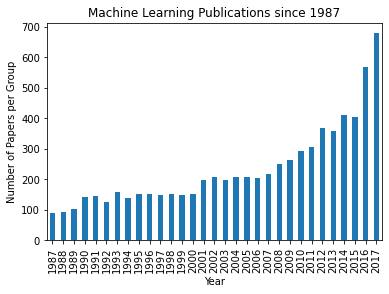

In [27]:
# Group the papers by year
groups =papers.groupby('year')

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Papers per Group')
plt.title('Machine Learning Publications since 1987')

In [21]:

# Print the titles of the first rows 
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].str.lower()

# Print the processed titles of the first rows 
papers['title_processed'].head(10)

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
5    using a neural net to instantiate a deformable...
6             plasticity-mediated competitive learning
7    iceg morphology classification using an analog...
8    real-time control of a tokamak plasma using ne...
9    pulsestream synapses with non-volatile analogu...
Name: title_processed, dtype: object

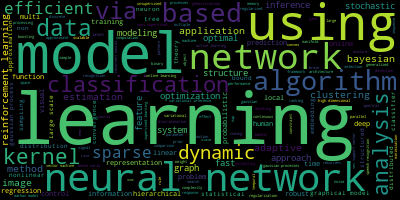

In [22]:
# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object, generate a wordcloud and visualise it
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

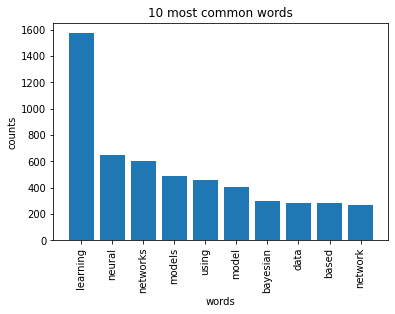

In [23]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [24]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 5

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
learning supervised large semi clustering

Topic #1:
learning networks neural deep unsupervised

Topic #2:
inference models analysis linear probabilistic

Topic #3:
models gaussian process regression learning

Topic #4:
learning optimization gradient stochastic methods

Topic #5:
vector neural support machines network

Topic #6:
information classification carlo monte minimization

Topic #7:
sparse using processes random markov

Topic #8:
neural networks time network model

Topic #9:
learning multi neurons classification temporal
